In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

In [58]:
car_df = pd.read_csv('data/cars.csv')

In [59]:
brand_df = pd.read_csv('data/brand.csv')

In [60]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [61]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [62]:
# car_df의 title에서 공백을 기준으로 첫 단어만 추출하고, 대문자를 소문자로 변환
car_df['brand_key'] = car_df['title'].str.split().str[0].str.lower()
# brand_df의 title도 소문자로 변환 (이미 소문자일 수 있지만 안전하게 처리)
brand_df['brand_key'] = brand_df['title'].str.lower()
# brand_key를 기준으로 병합
merged_df = pd.merge(car_df, brand_df, on='brand_key', how='left', suffixes=('_car', '_brand'))
merged_df.head()


,title_car,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_key,title_brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,vauxhall,United Kingdom


In [63]:
# brand_key 컬럼을 삭제합니다.
merged_df = merged_df.drop(columns=['brand_key'])

In [64]:
merged_df

,title_car,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,title_brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,renault,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,audi,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,bmw,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,Japan


In [65]:
# title_car, title_brand, country 순서로 열의 순서를 변경합니다.
merged_df = merged_df[['title_car', 'title_brand', 'country'] + [col for col in merged_df.columns if col not in ['title_car', 'title_brand', 'country']]]
merged_df

,title_car,title_brand,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,skoda,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,vauxhall,United Kingdom,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,hyundai,South Korea,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,mini,United Kingdom,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,vauxhall,United Kingdom,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,renault,France,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,audi,Germany,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,bmw,Germany,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,honda,Japan,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [66]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_car          3687 non-null   object 
 1   title_brand        3687 non-null   object 
 2   country            3687 non-null   object 
 3   Price              3687 non-null   int64  
 4   Mileage(miles)     3687 non-null   int64  
 5   Registration_Year  3687 non-null   int64  
 6   Previous Owners    2276 non-null   float64
 7   Fuel type          3687 non-null   object 
 8   Body type          3687 non-null   object 
 9   Engine             3642 non-null   object 
 10  Gearbox            3687 non-null   object 
 11  Doors              3662 non-null   float64
 12  Seats              3652 non-null   float64
 13  Emission Class     3600 non-null   object 
 14  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 432.2+ KB


In [76]:
merged_df.isna().sum()

title_car               0
title_brand             0
country                 0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history         0
dtype: int64

In [68]:
# 각 칼럼명에 대한 설명을 딕셔너리로 정리합니다.
column_descriptions = {
    'title_car': '자동차의 전체 모델명(예: SKODA FABIA)',
    'title_brand': '자동차 브랜드명(예: skoda)',
    'country': '브랜드의 원산지 국가',
    'Price': '자동차 가격',
    'Mileage(miles)': '주행 거리(마일 단위)',
    'Registration_Year': '최초 등록 연도',
    'Previous Owners': '이전 소유자 수',
    'Fuel type': '연료 종류(예: Petrol, Diesel 등)',
    'Body type': '차체 유형(예: Hatchback, Saloon 등)',
    'Engine': '엔진 배기량(예: 1.4L)',
    'Gearbox': '변속기 종류(예: Manual, Automatic 등)',
    'Doors': '문의 개수',
    'Seats': '좌석 수',
    'Emission Class': '배출가스 등급(예: Euro 4, Euro 5 등)',
    'Service history': '정비 이력(예: Full, NaN 등)'
}

# 칼럼명과 설명을 보기 좋게 출력합니다.
for col, desc in column_descriptions.items():
    print(f"{col}: {desc}")


title_car: 자동차의 전체 모델명(예: SKODA FABIA)
title_brand: 자동차 브랜드명(예: skoda)
country: 브랜드의 원산지 국가
Price: 자동차 가격
Mileage(miles): 주행 거리(마일 단위)
Registration_Year: 최초 등록 연도
Previous Owners: 이전 소유자 수
Fuel type: 연료 종류(예: Petrol, Diesel 등)
Body type: 차체 유형(예: Hatchback, Saloon 등)
Engine: 엔진 배기량(예: 1.4L)
Gearbox: 변속기 종류(예: Manual, Automatic 등)
Doors: 문의 개수
Seats: 좌석 수
Emission Class: 배출가스 등급(예: Euro 4, Euro 5 등)
Service history: 정비 이력(예: Full, NaN 등)


In [69]:
# Engine 컬럼에서 숫자만 추출하여 float형으로 변환합니다.
merged_df['Engine'] = merged_df['Engine'].str.extract(r'([\d\.]+)').astype(float)

In [72]:
# Emission Class 컬럼에서 'Euro ' 다음의 숫자만 추출하여 float형으로 변환합니다.
merged_df['Emission Class'] = merged_df['Emission Class'].str.extract(r'Euro\s*([\d\.]+)').astype(float)

In [73]:
merged_df

,title_car,title_brand,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,skoda,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN
1,VAUXHALL CORSA,vauxhall,United Kingdom,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full
2,HYUNDAI I30,hyundai,South Korea,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,NaN
3,MINI HATCH,mini,United Kingdom,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full
4,VAUXHALL CORSA,vauxhall,United Kingdom,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,renault,France,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,NaN
3683,AUDI A4,audi,Germany,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,NaN
3684,BMW 3 SERIES,bmw,Germany,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,NaN
3685,HONDA ACCORD,honda,Japan,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full


In [74]:
# service history 변수의 결측치를 'Unknown'으로 채웁니다.
merged_df['Service history'] = merged_df['Service history'].fillna('Unknown')

In [75]:
merged_df

,title_car,title_brand,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,skoda,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown
1,VAUXHALL CORSA,vauxhall,United Kingdom,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full
2,HYUNDAI I30,hyundai,South Korea,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown
3,MINI HATCH,mini,United Kingdom,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full
4,VAUXHALL CORSA,vauxhall,United Kingdom,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,renault,France,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown
3683,AUDI A4,audi,Germany,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown
3684,BMW 3 SERIES,bmw,Germany,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown
3685,HONDA ACCORD,honda,Japan,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full


In [77]:
# 결측치가 있는 데이터만 모아서 출력합니다.
missing_df = merged_df[merged_df.isnull().any(axis=1)]
missing_df


,title_car,title_brand,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
2,HYUNDAI I30,hyundai,South Korea,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown
4,VAUXHALL CORSA,vauxhall,United Kingdom,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown
6,FORD FOCUS,ford,United States,798,140599,2008,NaN,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown
7,VAUXHALL CORSA,vauxhall,United Kingdom,1995,90000,2009,NaN,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Unknown
8,VOLVO 740,volvo,Sweden,750,225318,2025,NaN,Petrol,Estate,2.3,Automatic,5.0,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,ROVER 800,rover,United Kingdom,3975,34000,1995,NaN,Petrol,Saloon,2.7,Automatic,4.0,NaN,NaN,Unknown
3680,CITROEN C3,citroen,France,1795,85962,2009,NaN,Diesel,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown
3683,AUDI A4,audi,Germany,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown
3684,BMW 3 SERIES,bmw,Germany,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown


In [78]:
# 각 행(row)별로 결측치가 3개 이상인 데이터를 제거합니다.
merged_df = merged_df[merged_df.isnull().sum(axis=1) < 3]
merged_df

,title_car,title_brand,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,skoda,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown
1,VAUXHALL CORSA,vauxhall,United Kingdom,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full
2,HYUNDAI I30,hyundai,South Korea,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown
3,MINI HATCH,mini,United Kingdom,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full
4,VAUXHALL CORSA,vauxhall,United Kingdom,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,renault,France,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown
3683,AUDI A4,audi,Germany,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown
3684,BMW 3 SERIES,bmw,Germany,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown
3685,HONDA ACCORD,honda,Japan,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full


In [79]:
merged_df.isna().sum()

title_car               0
title_brand             0
country                 0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1361
Fuel type               0
Body type               0
Engine                  1
Gearbox                 0
Doors                   7
Seats                  11
Emission Class         26
Service history         0
dtype: int64

In [80]:
# Seats 또는 Emission Class 컬럼에 결측치가 있는 데이터만 모아서 출력합니다.
missing_seats_emission = merged_df[merged_df['Seats'].isna() | merged_df['Emission Class'].isna()]
missing_seats_emission


,title_car,title_brand,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
95,RENAULT FLUENCE,renault,France,2490,67104,2010,1.0,Diesel,Saloon,1.5,Manual,4.0,5.0,NaN,Unknown
107,CITROEN XM,citroen,France,3250,126000,1995,4.0,Diesel,Hatchback,2.5,Manual,5.0,NaN,2.0,Unknown
163,HONDA ODYSSEY,honda,Japan,2449,88240,2012,NaN,Petrol,MPV,2.4,Automatic,5.0,7.0,NaN,Unknown
178,MERCEDES-BENZ CLK,mercedes-benz,Germany,3995,70000,2009,NaN,Petrol,Coupe,2.0,Automatic,2.0,5.0,NaN,Unknown
237,MG MIDGET,mg,United Kingdom,1875,75043,1972,3.0,Petrol,Convertible,1.3,Manual,2.0,NaN,NaN,Unknown
595,VAUXHALL ASTRA,vauxhall,United Kingdom,3950,56800,2015,4.0,Diesel,Hatchback,1.7,Manual,NaN,5.0,NaN,Unknown
645,ROVER MINI,rover,United Kingdom,1650,49309,1990,4.0,Petrol,Saloon,1.0,Automatic,2.0,NaN,NaN,Unknown
723,VOLKSWAGEN POLO,volkswagen,Germany,6995,65000,2012,NaN,Petrol,Hatchback,1.2,Automatic,5.0,5.0,NaN,Unknown
920,HONDA FREED,honda,Japan,6700,80000,2012,1.0,Petrol Hybrid,MPV,1.5,Automatic,5.0,6.0,NaN,Full
931,BMW 3 SERIES,bmw,Germany,6700,105000,1999,7.0,Petrol,Coupe,2.5,Manual,2.0,NaN,2.0,Unknown


In [81]:
# 결측치가 있는 행들에 대해, title_car, title_brand, country, Registration_Year의 차가 5 이내인 행들 중에서
# Seats, Emission Class 값이 존재하는 경우로 결측치를 채워줍니다.

import numpy as np

def fill_missing_by_similar(df, target_cols, ref_cols, year_col, year_tol=5):
    df_filled = df.copy()
    for idx, row in df[df[target_cols].isna().any(axis=1)].iterrows():
        # 결측치가 있는 컬럼만 처리
        for col in target_cols:
            if pd.isna(row[col]):
                # 조건: title_car, title_brand, country가 같고 Registration_Year 차이가 5 이내
                mask = (
                    (df['title_car'] == row['title_car']) &
                    (df['title_brand'] == row['title_brand']) &
                    (df['country'] == row['country']) &
                    (df[year_col].notna()) &
                    (abs(df[year_col] - row[year_col]) <= year_tol) &
                    (df[col].notna())
                )
                candidates = df.loc[mask, col]
                if not candidates.empty:
                    # 가장 많이 등장하는 값(최빈값)으로 채움
                    fill_value = candidates.mode().iloc[0]
                    df_filled.at[idx, col] = fill_value
    return df_filled

merged_df = fill_missing_by_similar(
    merged_df,
    target_cols=['Seats', 'Emission Class'],
    ref_cols=['title_car', 'title_brand', 'country'],
    year_col='Registration_Year',
    year_tol=5
)


In [84]:
# Engine 컬럼에 결측치가 있는 데이터만 모아서 출력합니다.
engine_missing = merged_df[merged_df['Engine'].isna()]
engine_missing

,title_car,title_brand,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
3031,VAUXHALL AMPERA,vauxhall,United Kingdom,9499,65767,2014,1.0,Petrol Plug-in Hybrid,Hatchback,NaN,Automatic,5.0,4.0,5.0,Unknown


In [91]:
merged_df.isna().sum()

title_car            0
title_brand          0
country              0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
dtype: int64

In [90]:
# Previous Owners의 결측치는 평균값으로 채웁니다.
mean_prev_owners = merged_df['Previous Owners'].mean()
merged_df['Previous Owners'] = merged_df['Previous Owners'].fillna(mean_prev_owners)

# Engine, Doors, Seats, Emission Class 결측치가 존재하는 데이터는 드롭합니다.
merged_df = merged_df.dropna(subset=['Engine', 'Doors', 'Seats', 'Emission Class'])

In [92]:
# StandardScaler를 활용하여 수치형 변수(Price, Mileage(miles), Registration_Year, Previous Owners, Doors, Seats, Emission Class)를 정규화합니다.
from sklearn.preprocessing import StandardScaler

# 정규화할 컬럼 리스트
num_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats', 'Emission Class']

scaler = StandardScaler()
merged_df[num_cols] = scaler.fit_transform(merged_df[num_cols])

# 정규화된 데이터 확인
merged_df.head()


/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_59017/3988444564.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[num_cols] = scaler.fit_transform(merged_df[num_cols])


,title_car,title_brand,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,skoda,Czech Republic,0.245866,-0.286400,0.853810,0.158671,Diesel,Hatchback,1.4,Manual,0.691130,0.175949,1.201456,Unknown
1,VAUXHALL CORSA,vauxhall,United Kingdom,-0.952184,0.179169,-0.830642,0.979841,Petrol,Hatchback,1.2,Manual,-1.333597,0.175949,-1.009198,Full
2,HYUNDAI I30,hyundai,South Korea,-1.073208,1.404466,-0.198973,0.001688,Petrol,Hatchback,1.4,Manual,0.691130,0.175949,0.096129,Unknown
3,MINI HATCH,mini,United Kingdom,-0.752694,0.385330,-0.409529,1.801012,Petrol,Hatchback,1.4,Manual,-1.333597,-1.563719,-1.009198,Full
4,VAUXHALL CORSA,vauxhall,United Kingdom,-1.061904,0.088440,0.222140,0.001688,Diesel,Hatchback,1.3,Manual,0.691130,0.175949,0.096129,Unknown


In [93]:
# PCA를 이용하여 기존 데이터의 정보(분산) 70% 이상을 설명하는 최소한의 주성분을 추출합니다.
from sklearn.decomposition import PCA

# 수치형 변수만 추출
X_num = merged_df[num_cols]

# PCA 객체 생성 (설명 분산 비율 0.7 이상)
pca = PCA(n_components=0.7)
X_pca = pca.fit_transform(X_num)

# 실제로 선택된 주성분의 개수 확인
print(f"설명 분산 비율 70% 이상을 가지는 주성분 개수: {pca.n_components_}")

# 주성분 데이터프레임 생성
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns, index=merged_df.index)

# 결과 확인
df_pca.head()


설명 분산 비율 70% 이상을 가지는 주성분 개수: 3


,PC1,PC2,PC3
0,1.317060,0.502386,0.674090
1,-1.964207,-0.635466,0.343915
2,-0.956034,0.956579,-0.146415
3,-2.025074,-1.847301,1.241135
4,-0.279742,0.701969,-0.036577


In [94]:
# 국가별 총 브랜드 개수 구하기
country_brand_counts = merged_df.groupby('country')['title_brand'].nunique()
print(country_brand_counts)


country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             10
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     6
United States      5
Name: title_brand, dtype: int64


                      Price  Mileage(miles)  Registration_Year  \
Price              1.000000       -0.503483           0.784432   
Mileage(miles)    -0.503483        1.000000          -0.444909   
Registration_Year  0.784432       -0.444909           1.000000   
Previous Owners   -0.403743        0.269254          -0.405416   
Doors              0.114137       -0.033870           0.216644   
Seats             -0.024977        0.095194           0.026256   
Emission Class     0.701779       -0.380286           0.919217   

                   Previous Owners     Doors     Seats  Emission Class  
Price                    -0.403743  0.114137 -0.024977        0.701779  
Mileage(miles)            0.269254 -0.033870  0.095194       -0.380286  
Registration_Year        -0.405416  0.216644  0.026256        0.919217  
Previous Owners           1.000000 -0.113913 -0.018806       -0.373664  
Doors                    -0.113913  1.000000  0.496937        0.181986  
Seats                    -0.01880

/opt/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


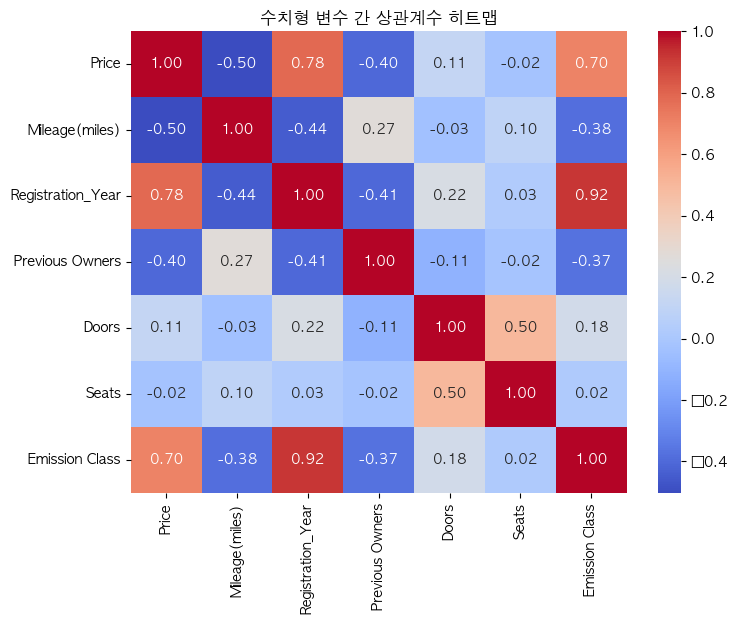

In [104]:
# 상관관계가 높은 변수들 확인
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수들의 상관계수 행렬 계산
corr_matrix = merged_df[num_cols].corr()

# 상관계수 행렬 출력
print(corr_matrix)

# 히트맵 시각화 (Mac 한글 폰트 설정)
import matplotlib as mpl
mpl.rc('font', family='AppleGothic')  # 맥에서 한글 폰트 깨짐 방지

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('수치형 변수 간 상관계수 히트맵')
plt.show()



/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_59017/3049497229.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_price.values, y=country_price.index, palette='viridis')
/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


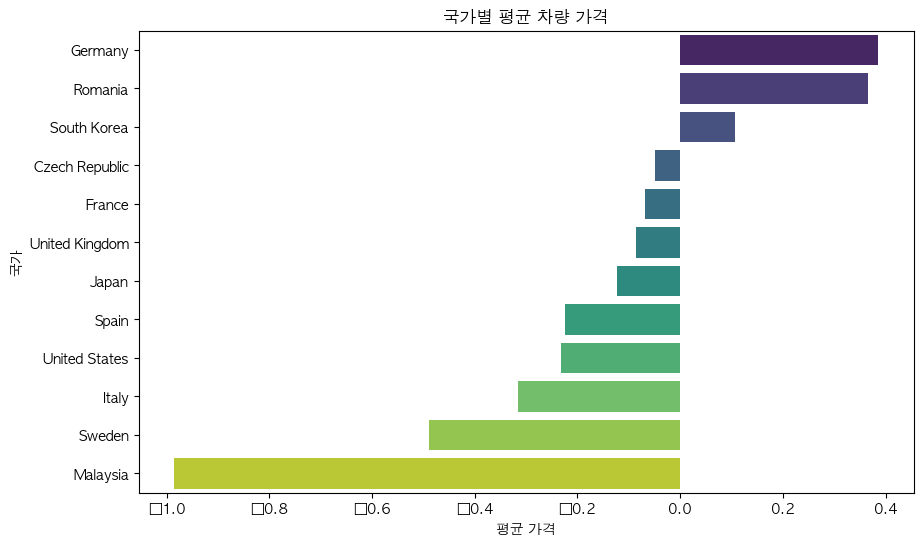

In [99]:
# 1. 국가별 평균 차량 가격 시각화
mpl.rc('font', family='AppleGothic')  # 맥에서 한글 폰트 깨짐 방지
plt.figure(figsize=(10,6))
country_price = merged_df.groupby('country')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=country_price.values, y=country_price.index, palette='viridis')
plt.title('국가별 평균 차량 가격')
plt.xlabel('평균 가격')
plt.ylabel('국가')
plt.show()

/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


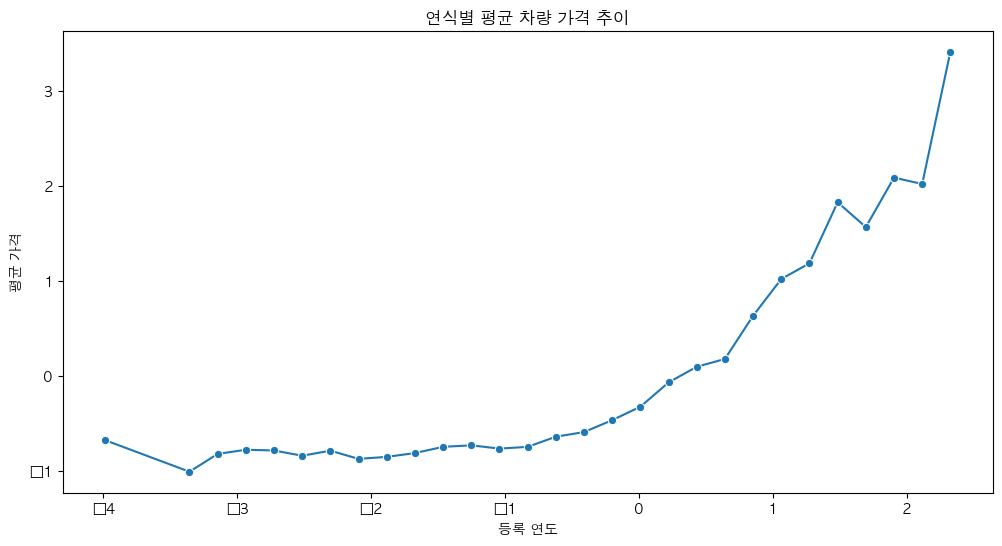

In [100]:
# 2. 연식(Registration_Year)별 평균 가격 추이
mpl.rc('font', family='AppleGothic')  # 맥에서 한글 폰트 깨짐 방지
plt.figure(figsize=(12,6))
year_price = merged_df.groupby('Registration_Year')['Price'].mean()
sns.lineplot(x=year_price.index, y=year_price.values, marker='o')
plt.title('연식별 평균 차량 가격 추이')
plt.xlabel('등록 연도')
plt.ylabel('평균 가격')
plt.show()

/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_59017/735254330.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='Set2')


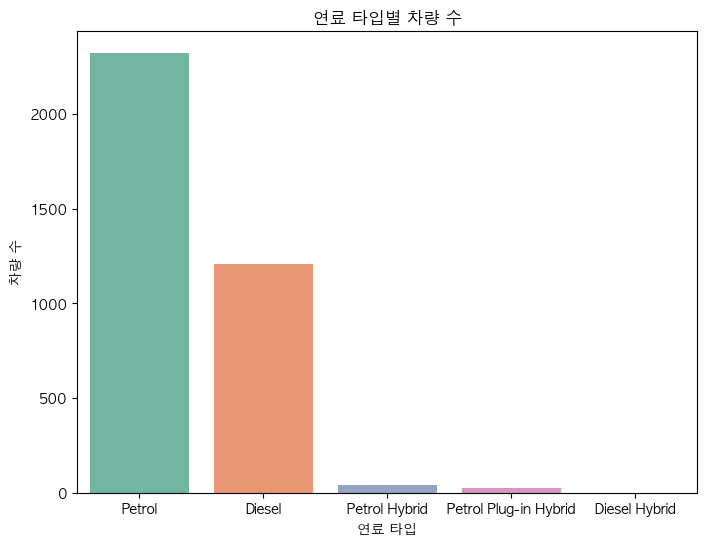

In [101]:
# 3. 연료 타입별 차량 수 비율
mpl.rc('font', family='AppleGothic')  # 맥에서 한글 폰트 깨짐 방지
plt.figure(figsize=(8,6))
fuel_counts = merged_df['Fuel type'].value_counts()
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='Set2')
plt.title('연료 타입별 차량 수')
plt.xlabel('연료 타입')
plt.ylabel('차량 수')
plt.show()

/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_59017/1226635024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_mileage.index, y=brand_mileage.values, palette='coolwarm')


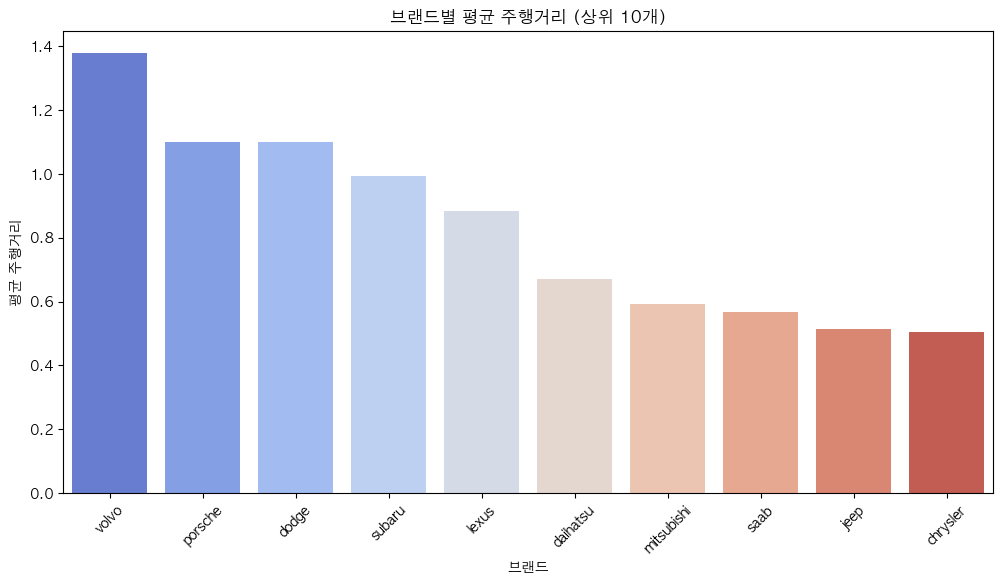

In [102]:
# 4. 브랜드별 평균 주행거리 상위 10개 브랜드
mpl.rc('font', family='AppleGothic')  # 맥에서 한글 폰트 깨짐 방지
plt.figure(figsize=(12,6))
brand_mileage = merged_df.groupby('title_brand')['Mileage(miles)'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=brand_mileage.index, y=brand_mileage.values, palette='coolwarm')
plt.title('브랜드별 평균 주행거리 (상위 10개)')
plt.xlabel('브랜드')
plt.ylabel('평균 주행거리')
plt.xticks(rotation=45)
plt.show()

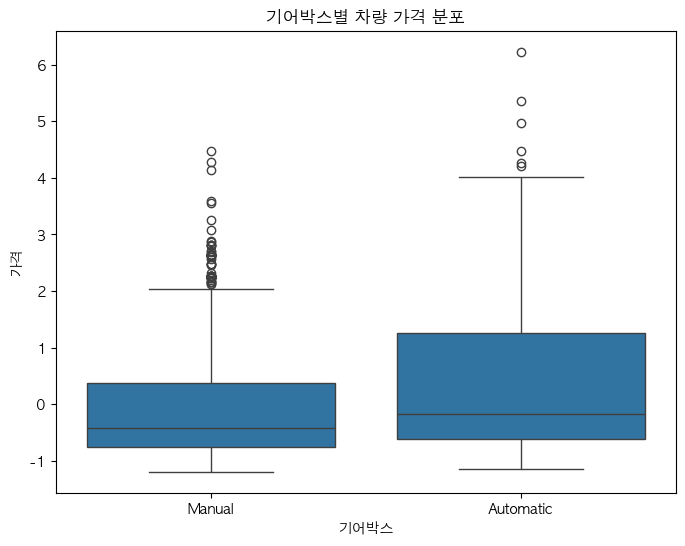

In [105]:
# 5. 기어박스(Gearbox)별 차량 가격 분포
mpl.rc('font', family='AppleGothic')  # 맥에서 한글 폰트 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
plt.figure(figsize=(8,6))
sns.boxplot(x='Gearbox', y='Price', data=merged_df)
plt.title('기어박스별 차량 가격 분포')
plt.xlabel('기어박스')
plt.ylabel('가격')
plt.show()